In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

import json
import time
import copy
from time import sleep
from selenium import webdriver
from pymongo import MongoClient
import pprint

In [7]:
client = MongoClient()
for db in client.list_databases():
    print(db)

{'name': 'admin', 'sizeOnDisk': 40960.0, 'empty': False}
{'name': 'config', 'sizeOnDisk': 110592.0, 'empty': False}
{'name': 'local', 'sizeOnDisk': 40960.0, 'empty': False}
{'name': 'productDatabase', 'sizeOnDisk': 782336.0, 'empty': False}


In [18]:
db = client.productDatabase
collections = db.productDB
pprint.pprint(collections.find_one())

{'_id': ObjectId('5f99254dde30145801186bdb'),
 'author_name': 'mikwoodbridg0',
 'avg_rating': 4.5,
 'category': 'Video Games & Consoles',
 'product_name': 'Microsoft Xbox One Day One Edition 500GB Black Console',
 'product_type': 'Video Game Consoles',
 'review_date': 'Jan 17, 2017',
 'review_text': 'you can easily download a PDF online product arrived with a '
                'faulty controller the up action on the left joystick was non '
                'functional this is the most used of all since it moves your '
                'character forward so no big deal I contacted the seller and a '
                'new one was shipped in 3 days flat and the machine as for a '
                'lil light scratches on the glossy part on top is perfect it '
                "is silent when running and didn't overheat even after left "
                'running for three days straight also it remained silent the '
                'gears on the door work perfect and unit is in very good '
      

In [19]:
data = pd.DataFrame(list(collections.find()))

In [20]:
data.shape

(4825, 10)

In [21]:
data.tail(300)

,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date
4525,5f99ac84de30145801187d88,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,I always believe in having a replacement/ back...,15,5.0,mccanntr1212,"Feb 28, 2019"
4526,5f99ac8ade30145801187d89,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,nice shape fast shipping great valeu very happ...,10,5.0,vangimarc,"Jan 08, 2018"
4527,5f99ac8fde30145801187d8a,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,Very nice unit. Brushless motor works great.,7,5.0,leroy1939,"Feb 13, 2019"
4528,5f99ac98de30145801187d8b,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,Good price.,2,5.0,2013ilbeker,"Apr 25, 2019"
4529,5f99ac9dde30145801187d8c,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,No problems,2,5.0,alan1284,"Mar 09, 2018"
...,...,...,...,...,...,...,...,...,...,...
4820,5f99b3f1de30145801187eaf,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,ts. No issues after a few weeks of use.,9,5.0,rfguy67,"Apr 20, 2017"
4821,5f99b3f7de30145801187eb0,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,"Compact, well designed , and LED light has thr...",24,5.0,neilthepainter,"Jan 06, 2020"
4822,5f99b3fdde30145801187eb1,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,Exceptional product as usual from DeWalt.It's ...,17,5.0,staffaber0,"May 05, 2018"
4823,5f99b403de30145801187eb2,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,e batteries with me and I knew what I was look...,43,5.0,kurtmoe1,"Mar 10, 2018"


In [22]:
data.info

<bound method DataFrame.info of                            _id                category         product_type  \
0     5f99254dde30145801186bdb  Video Games & Consoles  Video Game Consoles   
1     5f992553de30145801186bdc  Video Games & Consoles  Video Game Consoles   
2     5f992559de30145801186bdd  Video Games & Consoles  Video Game Consoles   
3     5f99255fde30145801186bde  Video Games & Consoles  Video Game Consoles   
4     5f992565de30145801186bdf  Video Games & Consoles  Video Game Consoles   
...                        ...                     ...                  ...   
4820  5f99b3f1de30145801187eaf           Home & Garden      Cordless Drills   
4821  5f99b3f7de30145801187eb0           Home & Garden      Cordless Drills   
4822  5f99b3fdde30145801187eb1           Home & Garden      Cordless Drills   
4823  5f99b403de30145801187eb2           Home & Garden      Cordless Drills   
4824  5f99b40ade30145801187eb3           Home & Garden      Cordless Drills   

                   

In [23]:
data.describe()

,avg_rating,word_count,star_rating
count,4825.000000,4825.000000,4825.000000
mean,4.638777,45.084352,4.414093
std,0.094121,79.025054,0.921532
min,4.500000,0.000000,1.000000
25%,4.600000,9.000000,4.000000
50%,4.600000,20.000000,5.000000
75%,4.600000,49.000000,5.000000
max,4.800000,614.000000,5.000000


In [24]:
data.columns

Index(['_id', 'category', 'product_type', 'product_name', 'avg_rating',
       'review_text', 'word_count', 'star_rating', 'author_name',
       'review_date'],
      dtype='object')

In [25]:
data.to_csv("two product types six brands.csv")
#data.loc[2000:2100, 'category':'review_date']

In [31]:
data.loc[4199:4438, 'category':'review_date']

,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date
4199,Video Games & Consoles,Video Game Consoles,Nintendo Switch HAC-001(-01) 32GB Console with...,4.8,this time. So many fun games to play and a lo...,18,5.0,johte_5,"Jun 16, 2020"
4200,Error,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,light above the trigger to guide you in not so...,20,5.0,jamesd8943,"Mar 22, 2017"
4201,Error,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,"Excellent cordless drill, battery life is very...",27,5.0,dennisc936,"Sep 21, 2016"
4202,Error,Error,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,"Powerful, compact, and Solid Drill. This drill...",33,5.0,jayv1972,"Sep 06, 2016"
4203,Error,Error,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,seful. The chuck tightens properly and I have ...,32,5.0,cedarisneater,"Dec 29, 2015"
...,...,...,...,...,...,...,...,...,...
4434,Error,Error,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,even lighter and as powerfulThe LED lights rea...,21,4.0,ebla1307,"Apr 10, 2019"
4435,Error,Error,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,Incredible savings on this drill IF you alread...,23,5.0,dalemorrison91,"May 19, 2019"
4436,Error,Error,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,Package arrived on schedule. Everything was t...,24,5.0,mill763,"Sep 18, 2016"
4437,Home & Garden,Cordless Drills,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,4.8,was refurbished. Great to know the tool has be...,26,5.0,pyrosecrets,"Aug 31, 2019"


In [40]:
dl = 'Jun 16, 2020'
print(int(dl.split(' ')[2]))
df1 = data
df1['review_date'] = df1.review_date.map(lambda x:int(x.split(' ')[2]))


2020


,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date
0,5f99254dde30145801186bdb,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,you can easily download a PDF online product a...,216,5.0,mikwoodbridg0,2017
1,5f992553de30145801186bdc,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ipe, aside from the two tone, was just how gro...",84,3.0,chrome_finch,2019
2,5f992559de30145801186bdd,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,(relative to the millions built) bad ones.In a...,265,4.0,qgerlach2004,2013
3,5f99255fde30145801186bde,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,sed this review off of previous experience wit...,614,4.0,nmcc6331,2013
4,5f992565de30145801186bdf,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ps you the new console as soon as you call, be...",148,4.0,minitorr,2013


In [41]:
data.head(100)

,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date
0,5f99254dde30145801186bdb,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,you can easily download a PDF online product a...,216,5.0,mikwoodbridg0,2017
1,5f992553de30145801186bdc,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ipe, aside from the two tone, was just how gro...",84,3.0,chrome_finch,2019
2,5f992559de30145801186bdd,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,(relative to the millions built) bad ones.In a...,265,4.0,qgerlach2004,2013
3,5f99255fde30145801186bde,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,sed this review off of previous experience wit...,614,4.0,nmcc6331,2013
4,5f992565de30145801186bdf,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ps you the new console as soon as you call, be...",148,4.0,minitorr,2013
...,...,...,...,...,...,...,...,...,...,...
95,5f9927ccde30145801186c3a,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,I won a bid for this gaming console at a unbea...,23,5.0,42_qc_n,2019
96,5f9927d2de30145801186c3b,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,That is the good offer and my son love it!,10,4.0,ro.farf.cpfrn6fqz,2018
97,5f9927d9de30145801186c3c,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,The Xbox stopped connecting to wifi about a mo...,27,2.0,jyntrstuar-0,2019
98,5f9927e0de30145801186c3d,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,Have to connect ethernet cable would have bee...,32,2.0,alexbuyitalexzandernow,2017


In [109]:
data1 = data.copy(deep=True)

In [110]:
def func(x):
    if x == 'Error':
        return 'Home & Garden'
    else:
        return x
data1['category'][data1['category']=='Error'] = 'Home & Garden'
data1['product_type'][data1['product_type']=='Error'] = 'Cordless Drills'
data1.tail(500)

<ipython-input-110-7a6f6ff63958>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['category'][data1['category']=='Error'] = 'Home & Garden'
<ipython-input-110-7a6f6ff63958>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['product_type'][data1['product_type']=='Error'] = 'Cordless Drills'


,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date
4325,5f99a71ede30145801187cc0,Home & Garden,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,Package arrived on schedule. Everything was t...,24,5.0,dubob2,2019
4326,5f99a727de30145801187cc1,Home & Garden,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,Works as it should. I have another one and the...,15,5.0,singercp1,2020
4327,5f99a730de30145801187cc2,Home & Garden,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,On time,2,5.0,50george2012,2019
4328,5f99a737de30145801187cc3,Home & Garden,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,great drill for the price,5,5.0,came.beck,2019
4329,5f99a740de30145801187cc4,Home & Garden,Cordless Drills,Milwaukee 2407-20 12V Cordless Drill Driver,4.8,"Milwaukee quality, power, and durability. Gre...",7,5.0,jes5012,2017
...,...,...,...,...,...,...,...,...,...,...
4820,5f99b3f1de30145801187eaf,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,ts. No issues after a few weeks of use.,9,5.0,rfguy67,2017
4821,5f99b3f7de30145801187eb0,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,"Compact, well designed , and LED light has thr...",24,5.0,neilthepainter,2020
4822,5f99b3fdde30145801187eb1,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,Exceptional product as usual from DeWalt.It's ...,17,5.0,staffaber0,2018
4823,5f99b403de30145801187eb2,Home & Garden,Cordless Drills,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,4.8,e batteries with me and I knew what I was look...,43,5.0,kurtmoe1,2018


In [111]:
data1.head(100)
def rating_func(x):
    if 0 <= x and x < 2:
        return '1 star'
    elif 2 <= x and x < 3:
        return '2 star'
    elif 3 <= x and x < 4:
        return '3 star'
    elif 4 <= x and x < 5:
        return '4 star'
    else:
        return '5 star'
    
data1['star_rating_category'] = data1['star_rating'].map(rating_func)
data1.head()

,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date,star_rating_category
0,5f99254dde30145801186bdb,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,you can easily download a PDF online product a...,216,5.0,mikwoodbridg0,2017,5 star
1,5f992553de30145801186bdc,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ipe, aside from the two tone, was just how gro...",84,3.0,chrome_finch,2019,3 star
2,5f992559de30145801186bdd,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,(relative to the millions built) bad ones.In a...,265,4.0,qgerlach2004,2013,4 star
3,5f99255fde30145801186bde,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,sed this review off of previous experience wit...,614,4.0,nmcc6331,2013,4 star
4,5f992565de30145801186bdf,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ps you the new console as soon as you call, be...",148,4.0,minitorr,2013,4 star


In [112]:
data1.shape

(4825, 11)

In [113]:
#Drop Duplicate Records
data1 = data1.drop_duplicates(subset=['author_name','star_rating','word_count','product_name'])
data1.shape

(2715, 11)

In [153]:
data1.head(500)

,_id,category,product_type,product_name,avg_rating,review_text,word_count,star_rating,author_name,review_date,star_rating_category
0,5f99254dde30145801186bdb,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,you can easily download a PDF online product a...,216.0,5.0,mikwoodbridg0,2017,5 star
1,5f992553de30145801186bdc,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ipe, aside from the two tone, was just how gro...",84.0,3.0,chrome_finch,2019,3 star
2,5f992559de30145801186bdd,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,(relative to the millions built) bad ones.In a...,265.0,4.0,qgerlach2004,2013,4 star
3,5f99255fde30145801186bde,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,sed this review off of previous experience wit...,614.0,4.0,nmcc6331,2013,4 star
4,5f992565de30145801186bdf,Video Games & Consoles,Video Game Consoles,Microsoft Xbox One Day One Edition 500GB Black...,4.5,"ps you the new console as soon as you call, be...",148.0,4.0,minitorr,2013,4 star
...,...,...,...,...,...,...,...,...,...,...,...
889,5f993f13de30145801186f54,Video Games & Consoles,Video Game Consoles,Sony PlayStation 4 500GB Jet Black Console,4.6,My son loves it.,4.0,5.0,rmgirma,2017,5 star
890,5f993f1ade30145801186f55,Video Games & Consoles,Video Game Consoles,Sony PlayStation 4 500GB Jet Black Console,4.6,Just got it today and was super surprised of h...,17.0,5.0,dangarb_81,2020,5 star
891,5f993f21de30145801186f56,Video Games & Consoles,Video Game Consoles,Sony PlayStation 4 500GB Jet Black Console,4.6,This product is amazing. My man loves it! It s...,33.0,5.0,kathrynksalas,2018,5 star
892,5f993f28de30145801186f57,Video Games & Consoles,Video Game Consoles,Sony PlayStation 4 500GB Jet Black Console,4.6,i have the 4 put i always play my 3 . its grea...,26.0,5.0,jaeraw215,2017,5 star


<Figure size 720x1440 with 0 Axes>

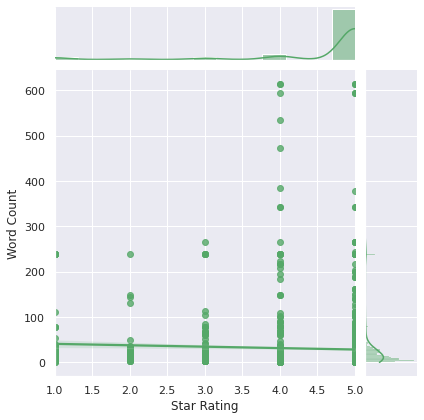

In [210]:
import seaborn as sns
plt.figure(figsize=(10,20))
sns.set(font_scale=1)
data1['word_count'] = data1['word_count'].astype(np.float64)
ax = sns.jointplot(data=data1,x='star_rating',y='word_count',kind='reg',color='g')
plt.xlabel('Star Rating')
plt.ylabel('Word Count')
#plt.title('Word Count Distribution For All Product Categories Combined')
#ax.fig.suptitle('Word Count Distribution For All Product Categories Combined')
#ax.fig.tight_layout()
plt.show()
#print(type(data1['word_count'][0]))

In [174]:
#Group the average star ratings for all the products
df_category_group = data1.groupby(['product_name','category']).agg({'star_rating':'mean'})
df_category_group = df_category_group.reset_index()
df_category_group = df_category_group.sort_values('category',ascending=True)
df_category_group.head(6)

,product_name,category,star_rating
0,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,Home & Garden,4.931373
1,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,Home & Garden,4.852349
3,Milwaukee 2407-20 12V Cordless Drill Driver,Home & Garden,4.800000
2,Microsoft Xbox One Day One Edition 500GB Black...,Video Games & Consoles,4.364754
4,Nintendo Switch HAC-001(-01) 32GB Console with...,Video Games & Consoles,4.794788
5,Sony PlayStation 4 500GB Jet Black Console,Video Games & Consoles,4.564645


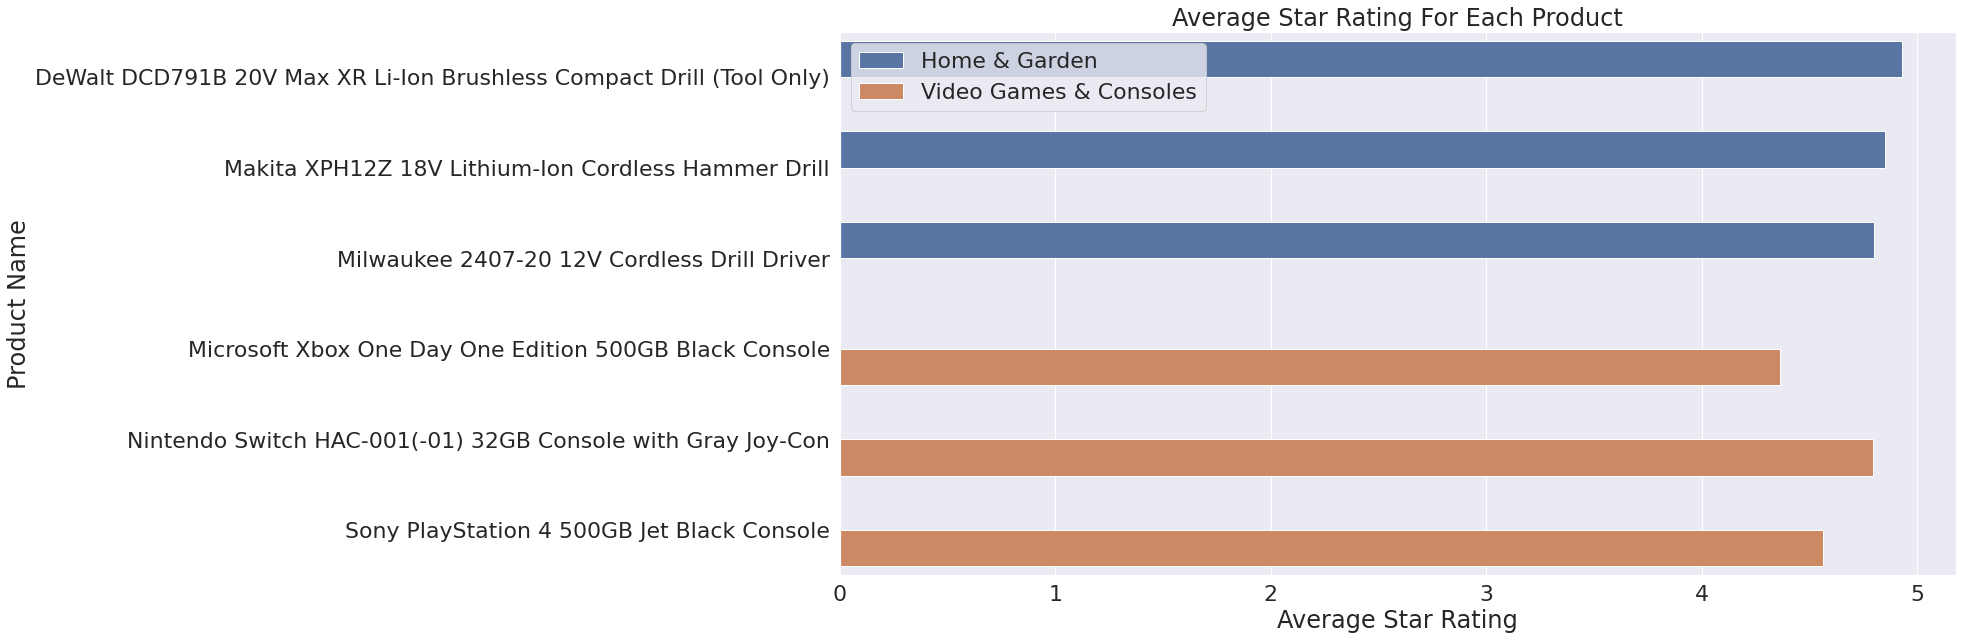

In [193]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
#sns.set_theme(style="whitegrid")
ax = sns.barplot(x="star_rating",y="product_name",hue="category",data=df_category_group)
plt.ylabel('Product Name')
plt.xlabel('Average Star Rating')
plt.title('Average Star Rating For Each Product')
#plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [214]:
#Group the average star ratings for all the products
df_rating_group = data1.groupby(['star_rating_category','category','product_name']).agg({'author_name':'count'})
df_rating_group = df_rating_group.reset_index()
df_rating_group = df_rating_group.sort_values('category',ascending=True)
df_rating_group.head(10)

,star_rating_category,category,product_name,author_name
0,1 star,Home & Garden,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1
1,1 star,Home & Garden,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,3
2,1 star,Home & Garden,Milwaukee 2407-20 12V Cordless Drill Driver,5
21,5 star,Home & Garden,Milwaukee 2407-20 12V Cordless Drill Driver,148
20,5 star,Home & Garden,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,136
19,5 star,Home & Garden,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,99
8,3 star,Home & Garden,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1
9,3 star,Home & Garden,Milwaukee 2407-20 12V Cordless Drill Driver,1
15,4 star,Home & Garden,Milwaukee 2407-20 12V Cordless Drill Driver,11
13,4 star,Home & Garden,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1


In [239]:
#Group by category and normalize the # of reviews for each star rating
df_rating_HomeGarden_group = df_rating_group[df_rating_group['category'] == 'Home & Garden']
df_rating_HomeGarden_group = df_rating_HomeGarden_group[['star_rating_category',
                                                         'product_name','author_name']].sort_values('product_name',ascending=True)
df_rating_HomeGarden_group.head(16)
df_rating_GameConsoles_group = df_rating_group[df_rating_group['category'] == 'Video Games & Consoles']
df_rating_GameConsoles_group = df_rating_GameConsoles_group[['star_rating_category',
                                                             'product_name','author_name']].sort_values('product_name',ascending=True)
#df_rating_GameConsoles_group.head(16)
df_rating_HomeGarden_group.head(16)

,star_rating_category,product_name,author_name
0,1 star,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1
19,5 star,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,99
8,3 star,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1
13,4 star,DeWalt DCD791B 20V Max XR Li-Ion Brushless Com...,1
1,1 star,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,3
20,5 star,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,136
14,4 star,Makita XPH12Z 18V Lithium-Ion Cordless Hammer ...,10
2,1 star,Milwaukee 2407-20 12V Cordless Drill Driver,5
21,5 star,Milwaukee 2407-20 12V Cordless Drill Driver,148
9,3 star,Milwaukee 2407-20 12V Cordless Drill Driver,1


In [247]:
def normalize_data(df):
    print(df.shape)
    x = df.values
    return x/np.sum(x) 
df_rating_msft = df_rating_GameConsoles_group.reset_index().loc[0:4,'star_rating_category':'author_name']
df_rating_msft['author_name'] = normalize_data(df_rating_msft['author_name'])
df_rating_msft = df_rating_msft.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_nint = df_rating_GameConsoles_group.reset_index().loc[5:8,'star_rating_category':'author_name']
df_rating_nint['author_name'] = normalize_data(df_rating_nint['author_name'])
df_rating_nint = df_rating_nint.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_pst = df_rating_GameConsoles_group.reset_index().loc[9:14,'star_rating_category':'author_name']
df_rating_pst['author_name'] = normalize_data(df_rating_pst['author_name'])
df_rating_pst = df_rating_pst.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_nint.head(20)
df_rating_dwt = df_rating_HomeGarden_group.reset_index().loc[0:3,'star_rating_category':'author_name']
df_rating_dwt['author_name'] = normalize_data(df_rating_dwt['author_name'])
df_rating_dwt = df_rating_dwt.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_mak = df_rating_HomeGarden_group.reset_index().loc[4:6,'star_rating_category':'author_name']
df_rating_mak['author_name'] = normalize_data(df_rating_mak['author_name'])
df_rating_mak = df_rating_mak.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_milw = df_rating_HomeGarden_group.reset_index().loc[7:10,'star_rating_category':'author_name']
df_rating_milw['author_name'] = normalize_data(df_rating_milw['author_name'])
df_rating_milw = df_rating_milw.rename(columns={'author_name':'number_reviews_normalized'})
df_rating_milw.head(20)
df_rating_norm = pd.concat([df_rating_msft,df_rating_nint,df_rating_pst,df_rating_dwt,
                           df_rating_mak,df_rating_milw],axis=0).reset_index()
df_rating_norm.head(40)

(5,)
(4,)
(5,)
(4,)
(3,)
(4,)


,index,star_rating_category,product_name,number_reviews_normalized
0,0,5 star,Microsoft Xbox One Day One Edition 500GB Black...,0.680328
1,1,4 star,Microsoft Xbox One Day One Edition 500GB Black...,0.159836
2,2,3 star,Microsoft Xbox One Day One Edition 500GB Black...,0.061475
3,3,2 star,Microsoft Xbox One Day One Edition 500GB Black...,0.040984
4,4,1 star,Microsoft Xbox One Day One Edition 500GB Black...,0.057377
5,5,4 star,Nintendo Switch HAC-001(-01) 32GB Console with...,0.035831
6,6,3 star,Nintendo Switch HAC-001(-01) 32GB Console with...,0.006515
7,7,1 star,Nintendo Switch HAC-001(-01) 32GB Console with...,0.039088
8,8,5 star,Nintendo Switch HAC-001(-01) 32GB Console with...,0.918567
9,9,4 star,Sony PlayStation 4 500GB Jet Black Console,0.093822


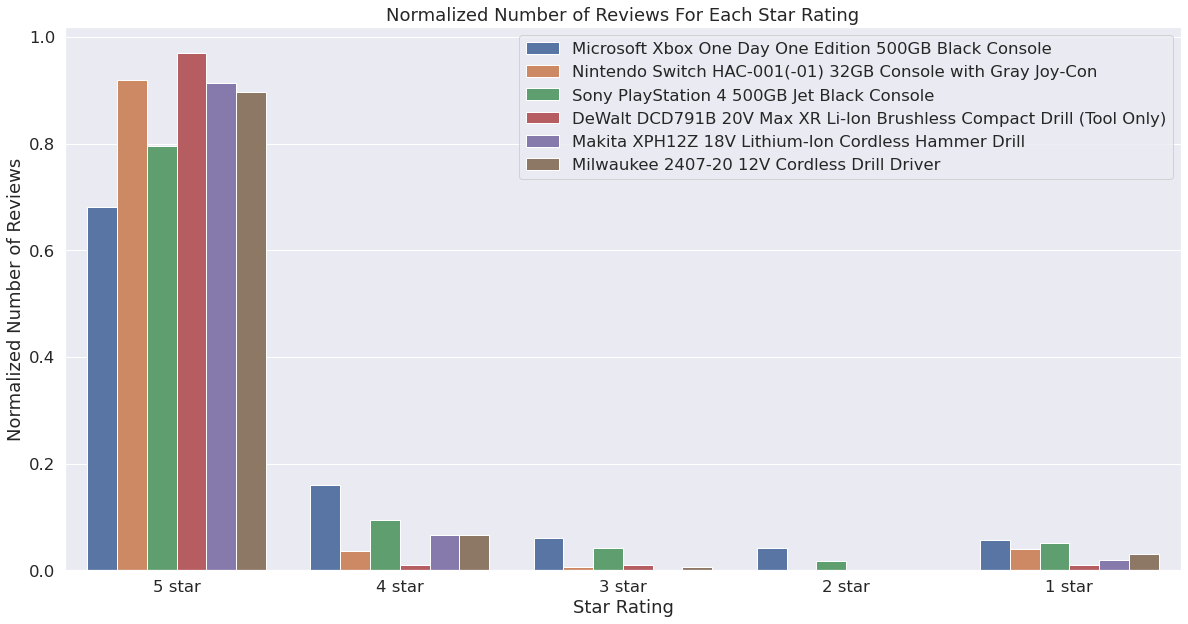

In [253]:
#Visualize the normalized distributions for # of reviews for product 
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
#sns.set_theme(style="whitegrid")
#g = sns.FacetGrid(df_rating_norm,col='star_rating_category',row='product_name')
#g.map(sns.barplot,'star_rating_category','number_reviews_normalized')

ax = sns.barplot(x="star_rating_category",y="number_reviews_normalized",hue="product_name",data=df_rating_norm)
plt.ylabel('Normalized Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Normalized Number of Reviews For Each Star Rating')
#plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

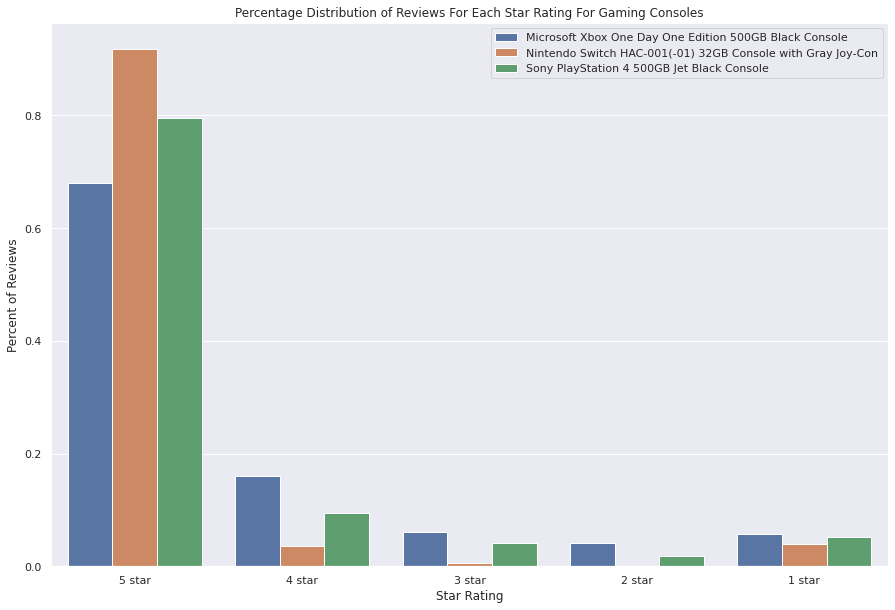

In [257]:
df_rating_norm_GC = pd.concat([df_rating_msft,df_rating_nint,df_rating_pst],axis=0).reset_index()

df_rating_norm_HA = pd.concat([df_rating_dwt,df_rating_mak,df_rating_milw],axis=0).reset_index()

plt.figure(figsize=(15,10))
sns.set(font_scale=1.0)
#sns.set_theme(style="whitegrid")
#g = sns.FacetGrid(df_rating_norm,col='star_rating_category',row='product_name')
#g.map(sns.barplot,'star_rating_category','number_reviews_normalized')

ax = sns.barplot(x="star_rating_category",y="number_reviews_normalized",hue="product_name",data=df_rating_norm_GC)
plt.ylabel('Percent of Reviews')
plt.xlabel('Star Rating')
plt.title('Percentage Distribution of Reviews For Each Star Rating For Gaming Consoles')
#plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

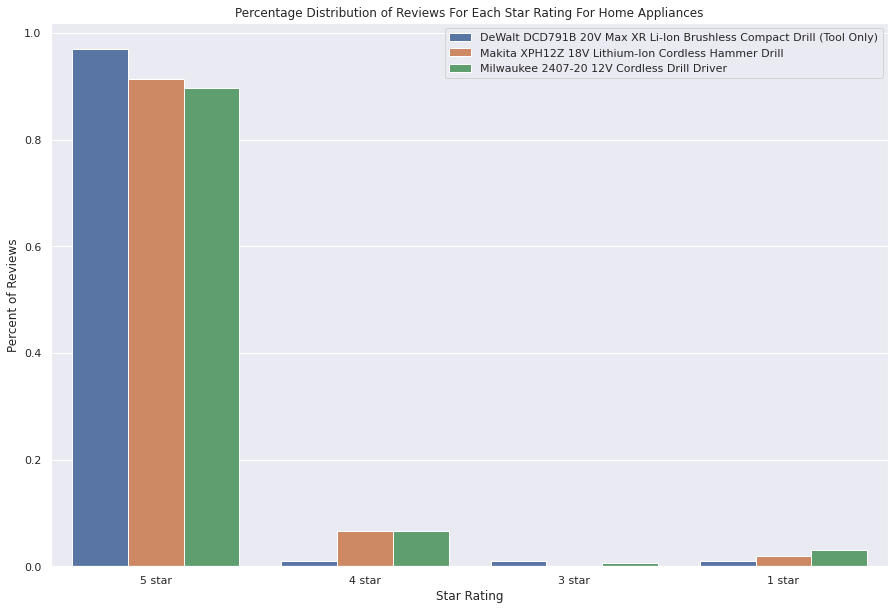

In [259]:
df_rating_norm_HA = pd.concat([df_rating_dwt,df_rating_mak,df_rating_milw],axis=0).reset_index().sort_values('star_rating_category',ascending=False)

plt.figure(figsize=(15,10))
sns.set(font_scale=1.0)
#sns.set_theme(style="whitegrid")
#g = sns.FacetGrid(df_rating_norm,col='star_rating_category',row='product_name')
#g.map(sns.barplot,'star_rating_category','number_reviews_normalized')

ax = sns.barplot(x="star_rating_category",y="number_reviews_normalized",hue="product_name",data=df_rating_norm_HA)
plt.ylabel('Percent of Reviews')
plt.xlabel('Star Rating')
plt.title('Percentage Distribution of Reviews For Each Star Rating For Home Appliances')
#plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [314]:
'''
Chi Square Test to test the null hypothesis that the distribution of 
5 Star Reviews is similar across all three products in the Home Appliances Category
'''
df_rating_pst.head(20)

,star_rating_category,product_name,number_reviews_normalized
9,4 star,Sony PlayStation 4 500GB Jet Black Console,0.093822
10,3 star,Sony PlayStation 4 500GB Jet Black Console,0.041190
11,2 star,Sony PlayStation 4 500GB Jet Black Console,0.017735
12,1 star,Sony PlayStation 4 500GB Jet Black Console,0.051487
13,5 star,Sony PlayStation 4 500GB Jet Black Console,0.795767


In [330]:
'''
brand1 = df_rating_dwt.sort_values('star_rating_category',ascending=True).values
brand2 = df_rating_mak.sort_values('star_rating_category',ascending=True).values
brand3 = df_rating_milw.sort_values('star_rating_category',ascending=True).values
brand4 = df_rating_msft.sort_values('star_rating_category',ascending=True).values
brand5 = df_rating_nint.sort_values('star_rating_category',ascending=True).values
brand6 = df_rating_pst.sort_values('star_rating_category',ascending=True).values
'''
brand1 = df_rating_HomeGarden_group.reset_index().loc[0:3,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values
brand2 = df_rating_HomeGarden_group.reset_index().loc[4:6,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values
brand3 = df_rating_HomeGarden_group.reset_index().loc[7:10,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values
brand4 = df_rating_GameConsoles_group.reset_index().loc[0:4,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values
brand5 = df_rating_GameConsoles_group.reset_index().loc[5:8,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values
brand6 = df_rating_GameConsoles_group.reset_index().loc[9:14,'star_rating_category':'author_name'].sort_values('star_rating_category',ascending=True).values

brand_list_HA = [brand1, brand2, brand3]
brand_list_GM = [brand4, brand5,brand6]

def create_chitest_matrix(num_star_ratings,num_brands,brand_list):
    arr = np.ones((num_star_ratings,num_brands))
    for col,brand in enumerate(brand_list):
        for row in range(brand.shape[0]):
            if brand[row][0] == '1 star':
                arr[0][col] = brand[row][brand.shape[1]-1]
            elif brand[row][0] == '2 star':
                arr[1][col] = brand[row][brand.shape[1]-1]
            elif brand[row][0] == '3 star':
                arr[2][col] = brand[row][brand.shape[1]-1]
            elif brand[row][0] == '4 star':
                arr[3][col] = brand[row][brand.shape[1]-1]
            elif brand[row][0] == '5 star':
                arr[4][col] = brand[row][brand.shape[1]-1]
    return arr

brand_list = brand_list_GM
num_star_ratings = 5
num_brands = len(brand_list)
arr = create_chitest_matrix(num_star_ratings,num_brands,brand_list)
print(arr)

[[1.400e+01 1.200e+01 9.000e+01]
 [1.000e+01 1.000e+00 3.100e+01]
 [1.500e+01 2.000e+00 7.200e+01]
 [3.900e+01 1.100e+01 1.640e+02]
 [1.660e+02 2.820e+02 1.391e+03]]


In [331]:
#Create a numpy matrix of size 4*6
from scipy import stats

rows,cols = arr.shape

def e_score(e_rowsum,e_colsum,e_sum):
    if (e_rowsum*e_colsum) == 0:
        raise Exception("E value cannot be zero, Failes to calculate Chi quared stat")
    score = (e_rowsum*e_colsum)/e_sum
    return score

def calc_chi_score(arr):    
    e_colsum = np.sum(arr,axis=0)
    e_rowsum = np.sum(arr,axis=1)
    e_sum = np.sum(e_colsum)
    T_stat = 0

    for i,e_i in enumerate(e_rowsum):
        for j,e_j in enumerate(e_colsum):
            T_stat += (arr[i][j]-e_score(e_i,e_j,e_sum))**2/e_score(e_i,e_j,e_sum)
    return T_stat
        
print(e_colsum,e_rowsum,e_sum,calc_chi_score(arr),(rows-1)*(cols-1))

[5. 5. 5.] [3. 3. 3. 3. 3.] 15.0 55.75597737296994 8


In [332]:
degrees_of_freedom = (rows-1)*(cols-1)
test_distribution = stats.chi2(degrees_of_freedom)
T_stat = calc_chi_score(arr)
p_value = 1-test_distribution.cdf(T_stat)
print("p-value for product distribution: {0}".format(p_value))
alpha = 0.05
m = num_brands
critical_value = alpha/m
print("For alpha = 0.05: {0}".format(critical_value))

p-value for product distribution: 3.146939375753277e-09
For alpha = 0.05: 0.016666666666666666
